In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


NameError: name 'halway_idx' is not defined

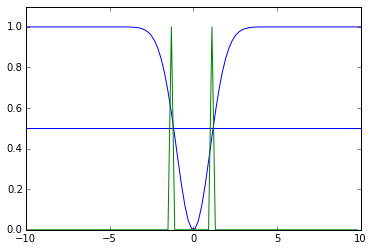

In [4]:
x = r_[-10:10:100j]
gauss = 1-exp(-x**2/2)
plot(x,gauss)
ylim(0,1.1)
axhline(y=0.5)
crossovers = diff(gauss < 0.5) 
plot(x[:-1],crossovers)
# find the two points where I cross the 50% line
halfway_idx = argwhere(diff(gauss<0.5))
x_crossings = x[halway_idx].flatten()
plot(x_crossings,r_[0.5,0.5],'o')

### Determining the frequencies corresponding to half-max rx values
Initialize

In [7]:
%pylab inline
import numpy as np
import pandas as pd
import scipy as sc
from scipy.io import loadmat
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Load data

In [8]:
data = loadmat('TC2_10dBm_181127.mat')

Fixing & Plotting Data, and Determining Min and Max Frequencies for Zooming in

[  9.85118182e+09   9.85227273e+09]


(9850000000.0, 9855000000.0)

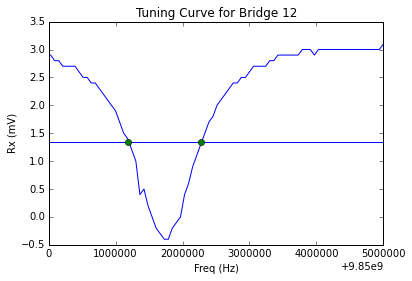

In [21]:

data = loadmat('TC2_10dBm_181127.mat')
rx = data['rx'].flatten() #flatten the data
freq = data['freq'].flatten()
rx1 = rx[1:] #removes the faulty first data point at 6.8 mV
freq1 = freq[1:] #remove first frequency to match
md = (max(rx1)+min(rx1))/2

plot(freq1, rx1)
xlabel('Freq (Hz)')
ylabel('Rx (mV)')
title('Tuning Curve for Bridge 12')
axhline(y=md) #plot a line to see the half-maximum of the tuning dip

#determining where the dip crosses the rx-value md
crossovers = diff(rx1<md) 
halfway_idx = argwhere(diff(rx1<md))

#finding the frequency values at which this occurs
x_crossings = freq1[halfway_idx].flatten()
plot(x_crossings,r_[md,md],'o')

#printing out those values
print x_crossings
freq=linspace(x_crossings[0],x_crossings[1],100)
xlim(9.85e9, 9.855e9)